In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type = 'table'"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
q = "SELECT * FROM facts WHERE name in('United States','Brazil') LIMIT 5"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,24,br,Brazil,8515770,8358140,157630,204259812,0.77,14.46,6.58,0.14
1,186,us,United States,9826675,9161966,664709,321368864,0.78,12.49,8.15,3.86


In [5]:
q = """
    SELECT 
        MIN(population), 
        MAX(population), 
        MIN(population_growth), 
        MAX(population_growth)
    FROM
        facts
"""
pd.read_sql_query(q,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [6]:
q = """
    SELECT 
        *
    FROM
        facts
    WHERE
        population = 0
        
"""
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [7]:
q = """
    SELECT 
        *
    FROM
        facts
    WHERE
        population = 7256490011
        
"""
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


The two queries above show two outliers:
- row with Id 250 has invalid data, such as population = 0
- row with id 261 has a sum of all countries

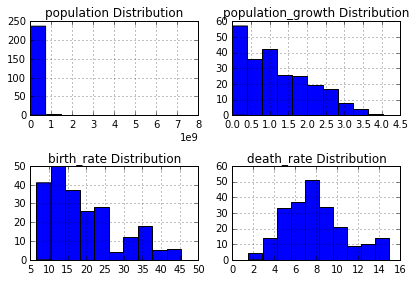

In [8]:
import matplotlib.pyplot as plt

q = """
    SELECT
        population, population_growth, birth_rate, death_rate
    FROM
        facts
    WHERE
        id NOT IN (250, 251)
"""
data = pd.read_sql_query(q,conn)

%matplotlib inline
n_rows = 2
n_cols = 2

fig = plt.figure()

for i, var_name in enumerate(data.columns):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    data[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name+" Distribution")
fig.tight_layout()  # Improves appearance a bit.
plt.show()




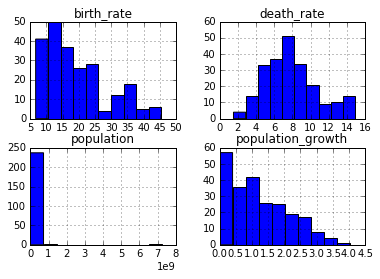

In [9]:
hist = data.hist(bins=10)

TOP 10 countries by population density:

In [10]:
q = """
    SELECT 
        name,
        ROUND(CAST(population as float)/CAST(area as float),2) population_density,
        population,
        area
    FROM
        facts
    ORDER BY
        population_density DESC
    LIMIT 10      
"""
pd.read_sql_query(q,conn)

,name,population_density,population,area
0,Macau,21168.96,592731,28
1,Monaco,15267.50,30535,2
2,Singapore,8141.28,5674472,697
3,Hong Kong,6445.04,7141106,1108
4,Gaza Strip,5191.82,1869055,360
5,Gibraltar,4876.33,29258,6
6,Bahrain,1771.86,1346613,760
7,Maldives,1319.64,393253,298
8,Malta,1310.02,413965,316
9,Bermuda,1299.93,70196,54


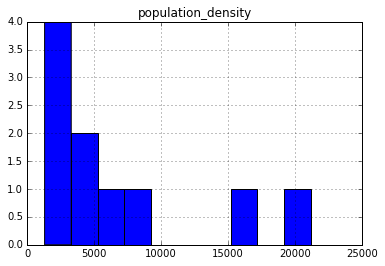

In [15]:
q = """
    SELECT         
        ROUND(CAST(population as float)/CAST(area as float),2) population_density
    FROM
        facts
    ORDER BY
        population_density DESC
    LIMIT 10      
"""
data = pd.read_sql_query(q,conn)
hist = data.hist(bins=10)

Countries with highest ratio of water to land:

In [20]:
q = """
    SELECT 
        name,
        ROUND(CAST(area_water as float)/CAST(area as float),2) population_density,
        population,
        area
    FROM
        facts
    WHERE
        name != 'British Indian Ocean Territory'
    ORDER BY
        population_density DESC
    LIMIT 10      
"""
pd.read_sql_query(q,conn)

,name,population_density,population,area
0,Virgin Islands,0.82,103574,1910
1,Puerto Rico,0.36,3598357,13791
2,"Bahamas, The",0.28,324597,13880
3,Guinea-Bissau,0.22,1726170,36125
4,Malawi,0.21,17964697,118484
5,Netherlands,0.18,16947904,41543
6,Uganda,0.18,37101745,241038
7,Eritrea,0.14,6527689,117600
8,Liberia,0.14,4195666,111369
9,Bangladesh,0.12,168957745,148460


Countries that have more water than land:

In [26]:
q = """
    SELECT 
        name,
        area_water > area_land
    FROM
        facts
    WHERE
        name != 'British Indian Ocean Territory'
        AND
        area_water > area_land
        
    ORDER BY
        area_water > area_land DESC
    LIMIT 10      
"""
pd.read_sql_query(q,conn)

,name,area_water > area_land
0,Virgin Islands,1
